# Basic Operation
- 가장 기본적인 Linear layer 만들기

In [1]:
import torch
import torch.nn as nn

class MyLinear(nn.Module): # Pytorch 모듈 중 nn 상속받기(nn에 있는 기능 사용 가능)
    def __init__(self, input_size, output_size): # 초기화 함수
        super(MyLinear, self).__init__()
        self.linear = nn.Linear(input_size, output_size) # nn모듈에 있는 Linear함수 사용하기
    
    def forward(self, x):
        y = self.linear(x) # x 연산하기(단순 linear)
        
        return y

In [2]:
linear = MyLinear(5, 2)

x = torch.randn(20, 5)
y = linear(x)
y

tensor([[ 0.1089, -0.2636],
        [ 0.5294, -0.5914],
        [ 0.5576,  0.8726],
        [ 0.3493,  0.1564],
        [ 1.1346,  0.9765],
        [ 0.5172, -1.1547],
        [-0.3351,  0.1552],
        [ 0.8525, -0.2887],
        [ 0.6405,  1.2904],
        [-0.0769, -0.6061],
        [-0.6678, -2.0713],
        [ 0.9161,  1.1582],
        [ 0.5384,  0.4532],
        [-0.1633,  0.4323],
        [-0.1057, -0.7594],
        [-0.3223, -1.2734],
        [-1.2308, -1.2261],
        [ 0.2539, -0.3652],
        [ 0.3143, -0.0641],
        [ 0.7364,  2.0214]], grad_fn=<ThAddmmBackward>)

In [3]:
# Parameters 확인하기
[p.size() for p in linear.parameters()]

[torch.Size([2, 5]), torch.Size([2])]

# Example 1
- 회귀식을 예측하는 신경망 설계
- y = 2x -> 기울기 '2' 예측하기
- 임위의 수 100개(x)와 오차값이 더해진 결과값(2x + error)를 이용해 회귀식 예측
- 예상 결과 : weight(기울기)는 2에 가깝고 bias(y 절편)는 0에 가깝다.

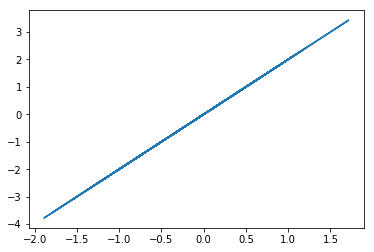

In [4]:
# 예상되는 결과
x = torch.randn(100,1)
y = 2*x

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure()
plt.plot(x.numpy(), y.numpy())

In [5]:
# model 정의
import torch
import torch.nn as nn
class MyModel(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        #torch.nn.init.zeros_(self.linear.weight) # 가중치(weight)를 0으로 초기화하기
        #torch.nn.init.zeros_(self.linear.bias) # bias를 0으로 초기화하기
        #self.linear.weight.data.fill_(2) # 원하는 숫자로 초기화(기울기)
        #self.linear.bias.data.fill_(0) # 원하는 숫자로 초기화(y절편)
        
    def forward(self, x):
        y = self.linear(x)
        
        return y
model = MyModel(1,1)
list(model.parameters()) # parameter 확인

[Parameter containing:
 tensor([[0.0407]], requires_grad=True), Parameter containing:
 tensor([0.1184], requires_grad=True)]

In [6]:
# 정답 함수 정의
def answer(x):
    return 2 * x

In [7]:
# train 정의
def train(model, x, y, optim):
    optim.zero_grad() # module안에 있는 모든 parameters 초기화
    
    # feed-forward
    y_hat = model(x)
    
    # 에러 계산하기
    loss = ((y - y_hat).pow(2)).sum() / x.size(0)
    
    # 오차값에 대한 기울기 구하기
    loss.backward()
    
    # 파라미터 갱신하기
    optimizer.step()
    
    # loss값 출력
    return loss

In [8]:
import torch.optim as optim

# 하이퍼-파라미터 설정
batch_size = 1
iter_size = 10000
epoch_size = 10000

model = MyModel(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.0001, momentum = 0.1)

print(model, '\n')
[print(p) for p in model.parameters()]

MyModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
) 

Parameter containing:
tensor([[0.9508]], requires_grad=True)
Parameter containing:
tensor([-0.0010], requires_grad=True)


[None, None]

In [9]:
for epoch in range(epoch_size):
    avg_loss = 0
    
    for i in range(iter_size):
        
        x = torch.randn(batch_size, 1)
        y = answer(x)
        
        loss = train(model, x, y, optimizer)
        
        avg_loss += loss
    avg_loss / iter_size
    
    x_valid = torch.FloatTensor([[.1]])
    y_valid = answer(x_valid)
    
    model.eval()
    y_hat = model(x_valid)
    model.train()
    
    print(avg_loss, y_valid.data[0], y_hat.data[0])
    
    if avg_loss < .001:
        break

tensor(2448.6677, grad_fn=<ThAddBackward>) tensor([0.2000]) tensor([0.1889])
tensor(28.9848, grad_fn=<ThAddBackward>) tensor([0.2000]) tensor([0.1984])
tensor(0.3396, grad_fn=<ThAddBackward>) tensor([0.2000]) tensor([0.1998])
tensor(0.0044, grad_fn=<ThAddBackward>) tensor([0.2000]) tensor([0.2000])
tensor(0.0001, grad_fn=<ThAddBackward>) tensor([0.2000]) tensor([0.2000])


In [10]:
for p in model.parameters():
    print(p) 

Parameter containing:
tensor([[1.9999]], requires_grad=True)
Parameter containing:
tensor([1.5046e-07], requires_grad=True)


# Example 2
- y = 3 * X1 + X2 - 2 * X3
- 예상되는 결과 : weight = [3, 1, -2], bias = [0]

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

class model(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(model, self).__init__()
        
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        
        y = self.linear(x)
        return y
    
model = model(3,1)
optimizer = optim.SGD(model.parameters(), lr = 0.001)

def generate_data(batch_size):
    x = torch.randn(batch_size, 3)
    
    return x

def answer(x):
    
    return 3 * x[:,0] + x[:,1] - 2 * x[:,2]

def loss_f(x):
    
    y = answer(x)
    y_hat = model(x)
    
    loss = ((y.view(batch_size,1) - y_hat).pow(2)).sum() / x.size(0)
    
    return loss

batch_size = 3
epoch_n = 1000
iter_n = 1000

print('Parameters : ')
for p in model.parameters():
    print(p)

print('')
print('Optimizer : ')
print(optimizer)
print('\n')

for epoch in range(1, epoch_n+1):
    avg_loss = 0
    
    for i in range(1, iter_n+1):
        x = torch.randn(batch_size, 3)
        
        optimizer.zero_grad()
        loss = loss_f(x.data)
        loss.backward()
        optimizer.step()
        
        avg_loss += loss
        
        print('\repoch : [{}/{}]({}/{})'.format(epoch, epoch_n, i, iter_n), end = ' ')
        
    avg_loss = avg_loss / iter_n
    
    x_valid = torch.FloatTensor([[1,2,3]])
    y_valid = answer(x_valid)
    
    model.eval()
    y_hat = model(x_valid)
    model.train()
    
    print('Train Loss : %.2f' %avg_loss.item(), y_valid.data[0], y_hat.data[0])
    
    if avg_loss < 0.001:
        print('\n')
        print('The Parameters of model')
        for p in model.parameters():
            print(p)
        break

Parameters : 
Parameter containing:
tensor([[0.1412, 0.0810, 0.4799]], requires_grad=True)
Parameter containing:
tensor([0.2757], requires_grad=True)

Optimizer : 
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)


epoch : [1/1000](1000/1000) Train Loss : 3.75 tensor(-1.) tensor([-0.5340])
epoch : [2/1000](1000/1000) Train Loss : 0.07 tensor(-1.) tensor([-0.9277])
epoch : [3/1000](1000/1000) Train Loss : 0.00 tensor(-1.) tensor([-0.9918])
epoch : [4/1000](1000/1000) Train Loss : 0.00 tensor(-1.) tensor([-0.9990])


The Parameters of model
Parameter containing:
tensor([[ 2.9992,  0.9997, -1.9992]], requires_grad=True)
Parameter containing:
tensor([0.0001], requires_grad=True)


# Example 3
- y = X1^2 + X2^2

Model(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=1, bias=True)
) 

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)

tensor(5.0093, grad_fn=<DivBackward0>)
tensor(1.2818, grad_fn=<DivBackward0>)
tensor(1.1506, grad_fn=<DivBackward0>)
tensor(0.5915, grad_fn=<DivBackward0>)
tensor(0.2667, grad_fn=<DivBackward0>)
tensor(0.2847, grad_fn=<DivBackward0>)
tensor(0.2594, grad_fn=<DivBackward0>)
tensor(0.2054, grad_fn=<DivBackward0>)
tensor(0.1404, grad_fn=<DivBackward0>)
tensor(0.1265, grad_fn=<DivBackward0>)


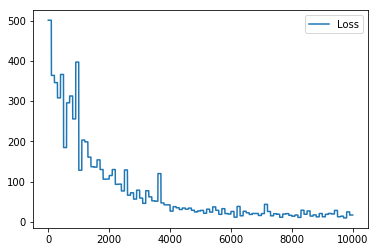

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# y = X1^2 + X2^2
def answer(x):
    
    y = x[:,0].pow(2) + x[:,1].pow(2)
    
    return y

class Model(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        
        self.linear1 = nn.Linear(input_size, 10)
        self.linear2 = nn.Linear(10, 1)
        
    def forward(self, x):
        
        y = F.relu(self.linear1(x))
        y = F.relu(self.linear2(y))
        
        return y
    
model = Model(2,1)
print(model, '\n')

loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

print(optimizer)
print('')

batch_size = 3
epoch_n = 100
iter_n = 100
loss_list = []
for epoch in range(epoch_n):
    loss_avg = 0
    for i in range(iter_n):
        
        x = torch.randn(batch_size, 2)
        y_hat = model(x)
        y = answer(x).view(y_hat.shape)
        
        optimizer.zero_grad()
        loss = loss_func(y_hat, y)
        loss.backward()
        optimizer.step()
        
        loss_avg += loss
        loss_list.append(loss_avg)
    
    loss_avg = loss_avg / iter_n
    
    if epoch % 10 == 0:
        print(loss_avg)
    
    if loss_avg < 0.0001:
        break
        

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_list, label = 'Loss')
plt.legend()
plt.show()

# 새로 배운 것

## 1. 서로 다른 사이즈의 두 Tensor의 size 맞춰주기
- tensor1.view(tensor2.shape)
- https://stackoverflow.com/questions/53569050/pytorch-how-can-i-make-same-size-of-tensor-modelx-and-answerx/53569303?noredirect=1#comment94007240_53569303

## 2. Regression에서는 손실함수로 CrossEntropyLoss를 사용하지 않는다.
- 대신 MSELoss나 L1loss를 사용한다.
- https://stackoverflow.com/questions/53571621/pytorch-crossentropy-error-in-simple-example-of-nn/53571764?noredirect=1#comment94011455_53571764